# Importing Libraries


In [1]:
import missingno as msno
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# cutomers

In [2]:
path = ("Uncleaned_CSV_files/Customers.csv")
customer_dt=pd.read_csv(path,encoding='latin-1') #character encoding standard (like é, ö, etc.)
customer_dt.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [3]:
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
# Check for missing values
print(customer_dt.isnull().sum())

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


In [5]:
#Droping useless columns
customer_dt.drop(["State Code","Zip Code"],axis=1,inplace=True)

In [6]:
# Remove duplicate rows
customer_dt.drop_duplicates(inplace=True)

In [7]:
# Convert Birthday column to datetime
customer_dt['Birthday'] = pd.to_datetime(customer_dt['Birthday'], format = '%m/%d/%Y')
customer_dt.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19


In [8]:
#checking null set and data types
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 954.3+ KB


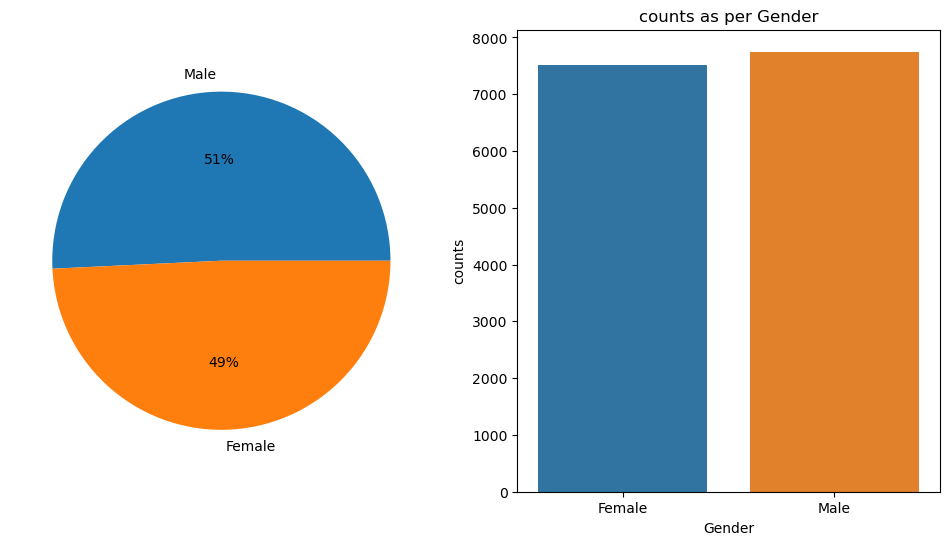

In [9]:
# visualize gender details
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(customer_dt["Gender"].value_counts(), autopct='%1.0f%%', labels=['Male', 'Female'])
plt.subplot(1,2,2)
sns.countplot(x= customer_dt["Gender"],data=customer_dt,hue="Gender")
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")
plt.show()

Text(0.5, 1.0, 'Counts as per Country')

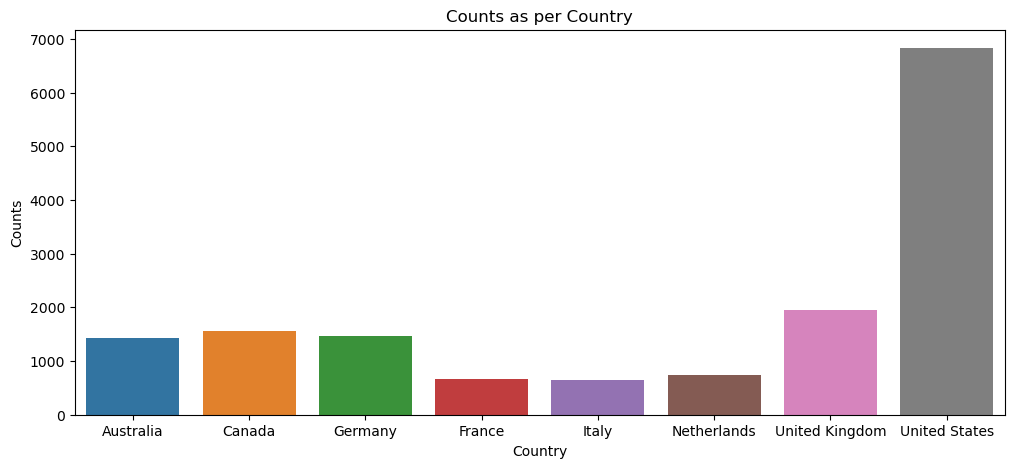

In [10]:
# visualize country counts
plt.figure(figsize=(12,5))
sns.countplot(x= customer_dt["Country"],data=customer_dt,hue="Country")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")

#Exchange_Rates

In [11]:
df_exchange=pd.read_csv("Uncleaned_CSV_files/Exchange_Rates.csv")
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [12]:
# Check for missing values
print(df_exchange.isnull().sum())
# If there are missing values, decide on a strategy for handling them (e.g., drop rows, impute with mean/median).

# Summary statistics
print(df_exchange.describe())

# Check data types
print(df_exchange.dtypes)

Date        0
Currency    0
Exchange    0
dtype: int64
           Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300
Date         object
Currency     object
Exchange    float64
dtype: object


In [13]:
# Convert 'Date' column to datetime objects
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'])

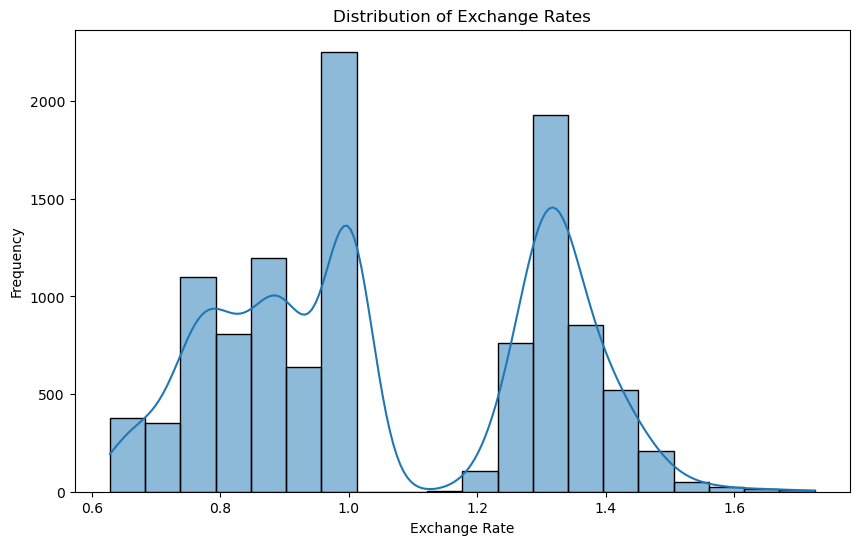

In [14]:
# Visualize the distribution of 'Exchange' rates
plt.figure(figsize=(10, 6))
sns.histplot(df_exchange['Exchange'], bins=20, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

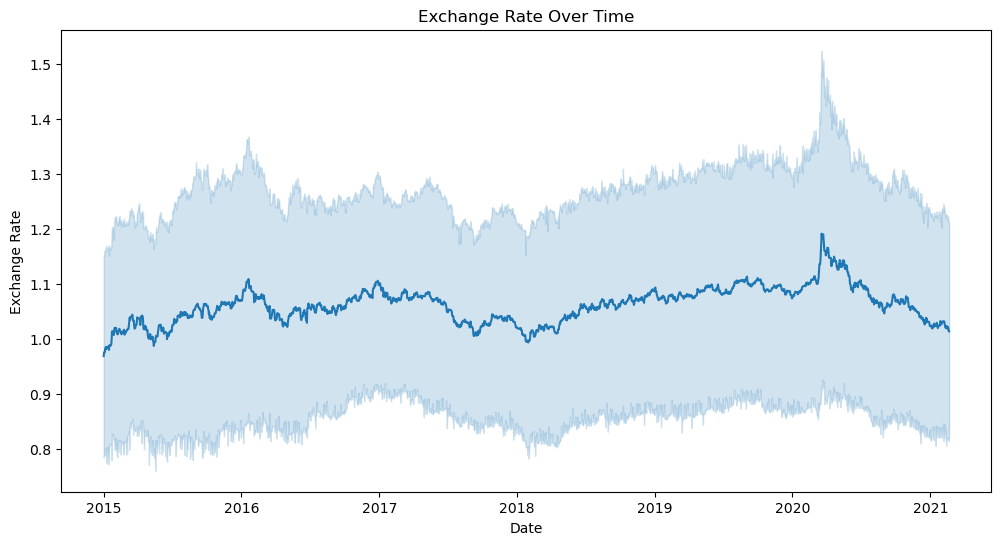

In [15]:
# Analyze the 'Exchange' rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Exchange', data=df_exchange)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

#Products

In [16]:
df_products=pd.read_csv("Uncleaned_CSV_files/Products.csv")
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [17]:
# Inspect the data
print(df_products.info())  # Get information about the dataframe
print(df_products.describe())  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None
        ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.000000     3.000000
50%    1259.000000  

In [18]:
# Check for missing values in each column
print(df_products.isnull().sum())

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [19]:
# Data Type Conversion
# Convert columns to the appropriate data types if needed
# Example: Convert 'Unit Cost USD' and 'Unit Price USD' to numeric type
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)

In [20]:
# Remove Duplicates
# Check for duplicate rows and remove them if necessary
df_products.drop_duplicates(inplace=True)

In [21]:
df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

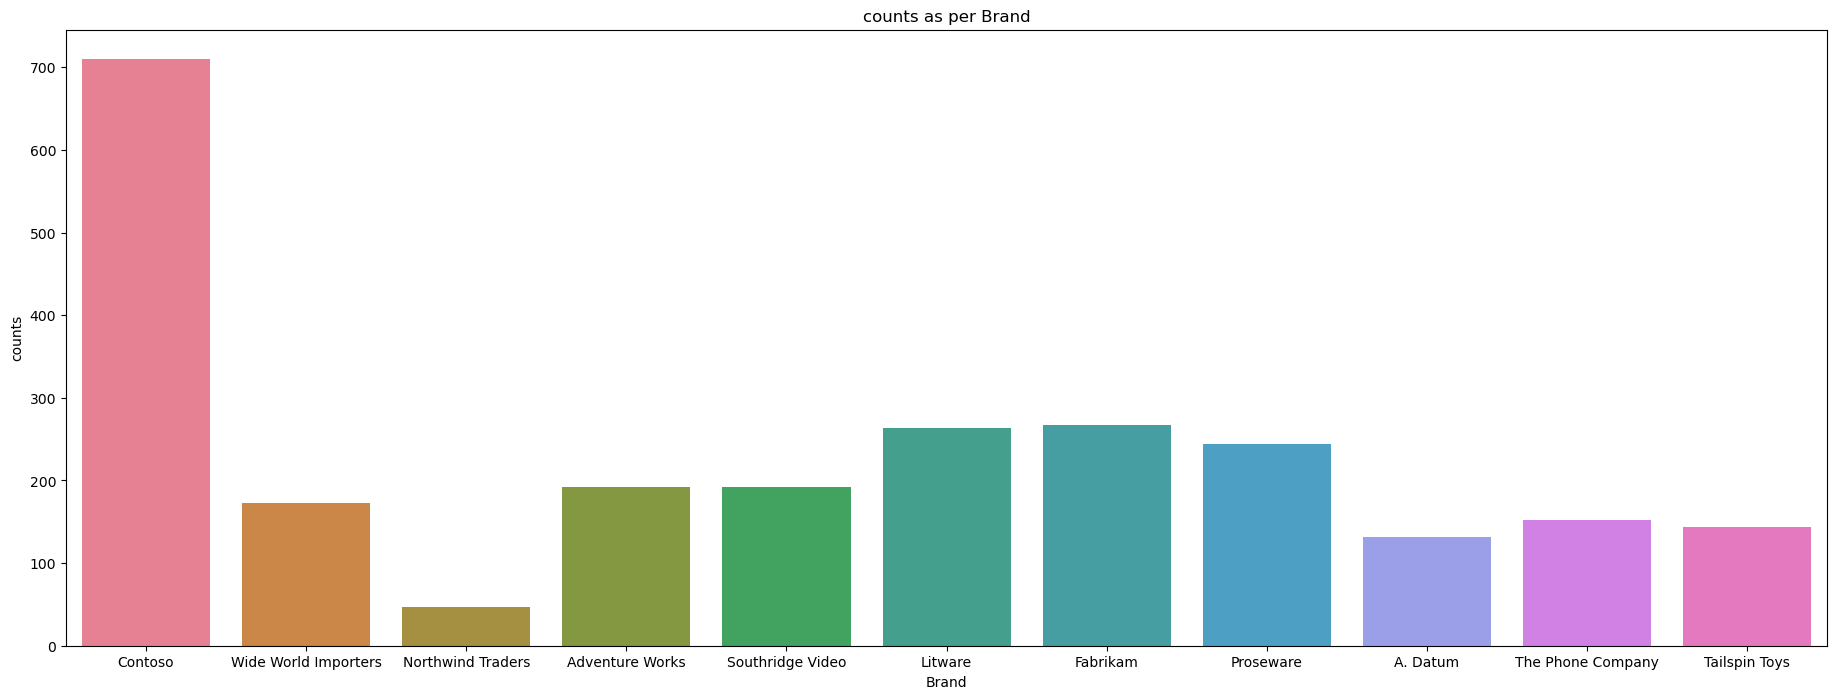

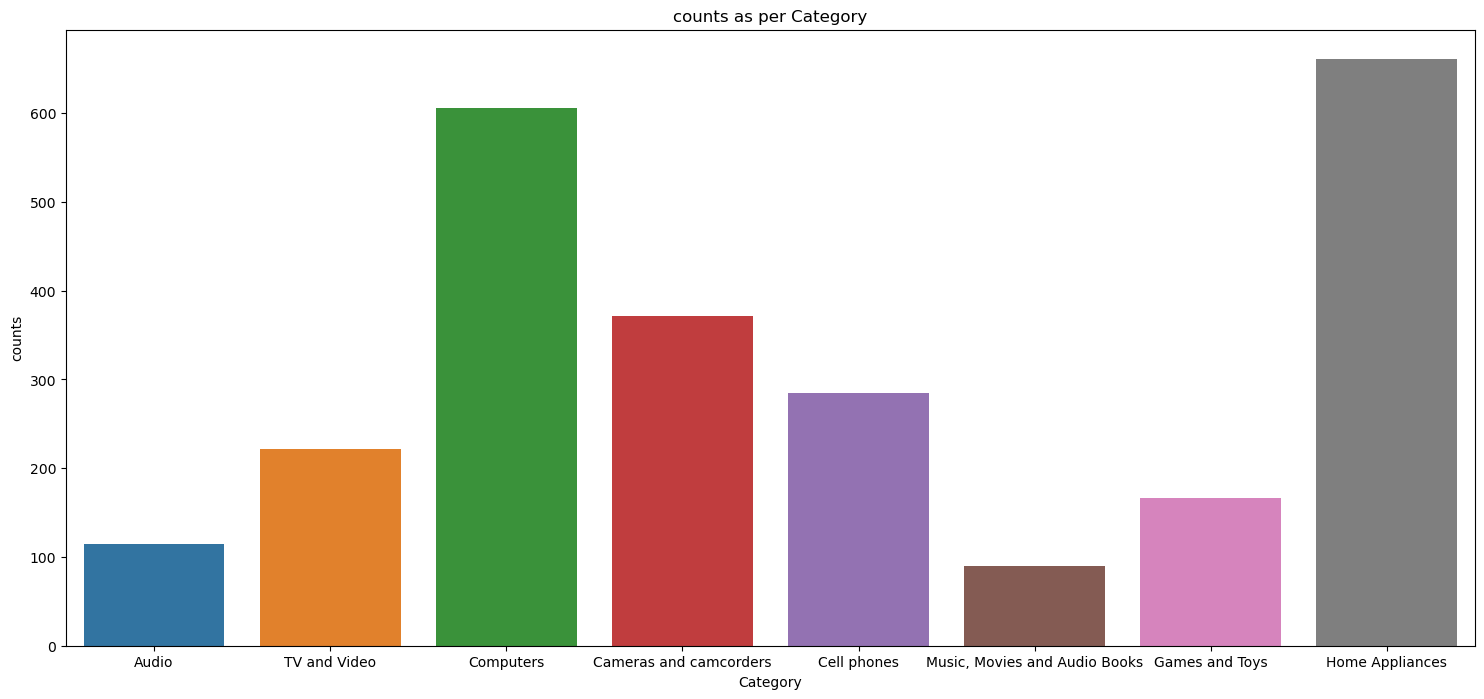

In [22]:
#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

#Sales

In [23]:
df_sales=pd.read_csv("Uncleaned_CSV_files/Sales.csv")
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [24]:
# Get information about the dataframe, including data types and missing values
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None


In [25]:
# Generate descriptive statistics for numerical columns
print(df_sales.describe())

       Order Number     Line Item   CustomerKey      StoreKey    ProductKey  \
count  6.288400e+04  62884.000000  6.288400e+04  62884.000000  62884.000000   
mean   1.430905e+06      2.164207  1.180797e+06     31.802144   1125.859344   
std    4.532963e+05      1.365170  5.859634e+05     22.978188    709.244010   
min    3.660000e+05      1.000000  3.010000e+02      0.000000      1.000000   
25%    1.121017e+06      1.000000  6.808580e+05      8.000000    437.000000   
50%    1.498016e+06      2.000000  1.261200e+06     37.000000   1358.000000   
75%    1.788010e+06      3.000000  1.686496e+06     53.000000   1650.000000   
max    2.243032e+06      7.000000  2.099937e+06     66.000000   2517.000000   

           Quantity  
count  62884.000000  
mean       3.144790  
std        2.256371  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max       10.000000  


In [26]:
# Check for missing values in each column
print(df_sales.isnull().sum())

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64


In [27]:
# Convert 'Order Date' column to datetime objects
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

In [28]:
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [29]:
# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

In [30]:
# Check for duplicates
print(df_sales.duplicated().sum())

0


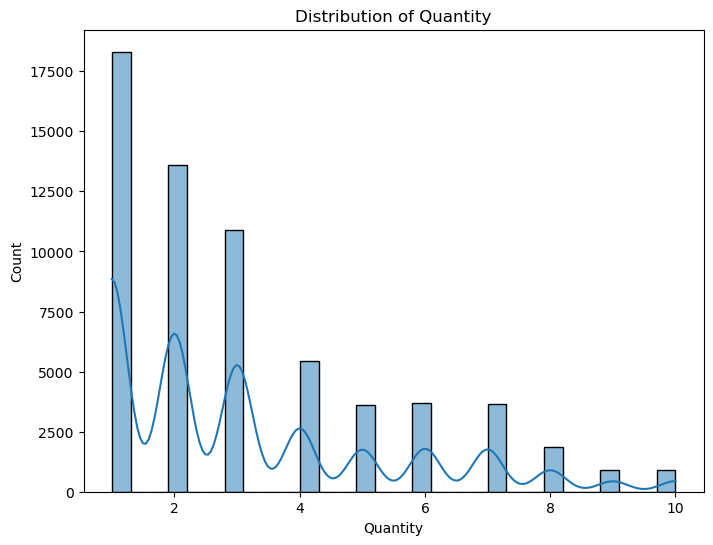

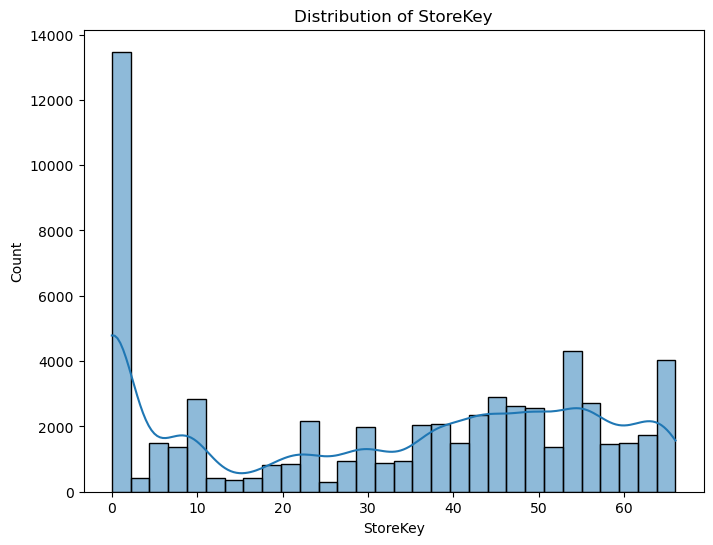

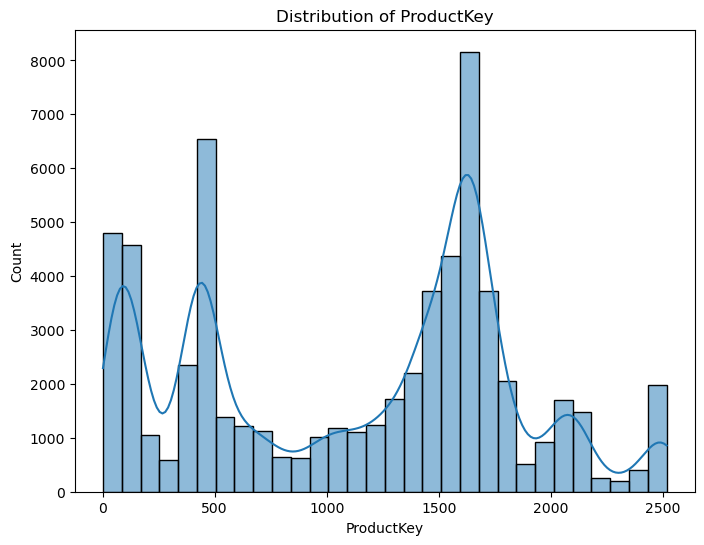

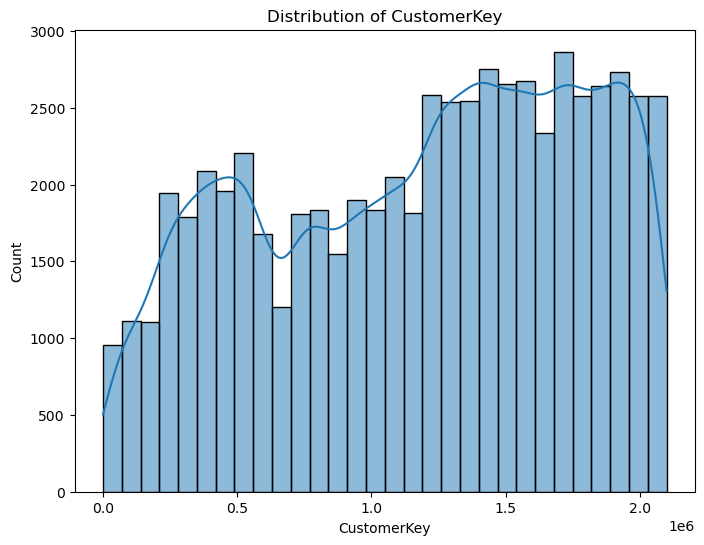

In [31]:
# Explore distributions of numerical features
numerical_features = ['Quantity', 'StoreKey', 'ProductKey', 'CustomerKey']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

#Stores

In [32]:
df_stores=pd.read_csv("Uncleaned_CSV_files/Stores.csv")
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [33]:
# Display basic information about the dataframe
print(df_stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None


In [34]:
# Check for missing values
print(df_stores.isnull().sum())

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


In [35]:
# Data Cleaning
# Convert 'Open Date' to datetime objects
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'])

In [36]:
df_stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [37]:
# Remove duplicate rows (if any)
df_stores.drop_duplicates(inplace=True)